# Background for the given data analytics problem and dataset.
All relevant background information for this exercise will be provided in the PDF report "Data_Quality_Report.pdf".

### Import relevant packages & read in data form the CSV

In [1]:
import pandas as pd


# Import package numpy for numeric computing
import numpy as np

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

#For showing plots directly in the notebook run the command below
%matplotlib inline

# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')

from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('covid19-cdc-20206773.csv')

# 1. Prepare a data quality report for the CSV file.

### Print first and last 5 rows of the CSV file


In [3]:
df.head(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/11/15,2020/11/15,NaN,NaN,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
1,2020/09/02,2020/09/02,NaN,2020/09/02,Laboratory-confirmed case,Male,40 - 49 Years,Unknown,Missing,Missing,No,Missing
2,2020/03/23,2020/06/10,NaN,2020/03/23,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Unknown,No,Yes
3,2020/10/05,2020/10/05,2020/10/05,NaN,Laboratory-confirmed case,Male,50 - 59 Years,"Black, Non-Hispanic",Unknown,Unknown,No,No
4,2020/12/01,NaN,NaN,NaN,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Missing,No,Missing


In [4]:
df.tail(5)

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
9995,2020/12/04,2020/12/04,2020/12/04,2020/12/04,Laboratory-confirmed case,Female,50 - 59 Years,"Asian, Non-Hispanic",No,No,No,Yes
9996,2021/01/08,2021/01/18,2021/01/08,NaN,Laboratory-confirmed case,Male,50 - 59 Years,Unknown,Missing,Missing,No,Missing
9997,2020/05/30,2020/05/30,NaN,2020/05/30,Laboratory-confirmed case,Male,60 - 69 Years,Unknown,Yes,Yes,No,Missing
9998,2020/06/20,2020/07/02,NaN,2020/06/20,Laboratory-confirmed case,Male,10 - 19 Years,Hispanic/Latino,No,Missing,No,Missing
9999,2021/01/03,2021/01/06,NaN,2021/01/03,Laboratory-confirmed case,Female,20 - 29 Years,"White, Non-Hispanic",No,Missing,No,Missing


In [5]:
df.shape

(10000, 12)

The Dataset has 10000 data entries and 12 features.

### Convert all features to appropriate datatypes. 

In [6]:
df.dtypes

cdc_case_earliest_dt       object
cdc_report_dt              object
pos_spec_dt                object
onset_dt                   object
current_status             object
sex                        object
age_group                  object
race_ethnicity_combined    object
hosp_yn                    object
icu_yn                     object
death_yn                   object
medcond_yn                 object
dtype: object

Based on the data, it appears that all of the features are of type object. The first four objects in the list are dates, these too will be treated as categorical data as the dates only range over a couple of months. However, in order to conform to the type of data within these four features, they will be converted into datetime data type, but will still be treated as categorical data nonetheless. The rest of the objects in theis dataset will be converted to data type 'category' and treated as categorical data. There are no numerical or continuous features in this dataset.

In [7]:
#converting the features with dates to datetime data types. 
date_columns = df[['cdc_case_earliest_dt','cdc_report_dt','pos_spec_dt', 'onset_dt']].columns

for column in date_columns:
    df[column] = pd.to_datetime(df[column])


In [8]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
object_columns

#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')


In [9]:
#updated data types
df.dtypes

cdc_case_earliest_dt       datetime64[ns]
cdc_report_dt              datetime64[ns]
pos_spec_dt                datetime64[ns]
onset_dt                   datetime64[ns]
current_status                   category
sex                              category
age_group                        category
race_ethnicity_combined          category
hosp_yn                          category
icu_yn                           category
death_yn                         category
medcond_yn                       category
dtype: object

In [10]:
df.describe().T

,count,unique,top,freq,first,last
cdc_case_earliest_dt,10000,325,2021-01-04 00:00:00,131,2020-01-06,2021-01-16
cdc_report_dt,7712,326,2020-06-10 00:00:00,141,2020-03-02,2021-01-29
pos_spec_dt,2870,315,2020-11-30 00:00:00,35,2020-03-06,2021-01-24
onset_dt,5069,325,2020-12-11 00:00:00,45,2020-02-15,2021-01-20
current_status,10000,2,Laboratory-confirmed case,9338,NaT,NaT
sex,10000,4,Female,5200,NaT,NaT
age_group,10000,10,20 - 29 Years,1895,NaT,NaT
race_ethnicity_combined,10000,9,Unknown,4051,NaT,NaT
hosp_yn,10000,4,No,5223,NaT,NaT
icu_yn,10000,4,Missing,7595,NaT,NaT


### Checking for duplicate rows and columns

In [11]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  486
Number of duplicate rows (including first) in the table is: 855


In [12]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


In [13]:
# Show duplicate row data.
pd.set_option('display.max_rows', 25)
df[df.duplicated(keep=False)]

,cdc_case_earliest_dt,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,icu_yn,death_yn,medcond_yn
0,2020-11-15,2020-11-15,NaT,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,No,Missing,No,Missing
4,2020-12-01,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,Missing,No,Missing
36,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,Missing
53,2021-01-14,NaT,NaT,NaT,Laboratory-confirmed case,Male,30 - 39 Years,Unknown,Missing,Missing,No,Missing
54,2020-12-16,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,Missing,No,Missing
...,...,...,...,...,...,...,...,...,...,...,...,...
9899,2020-12-29,NaT,NaT,NaT,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,No,Missing,No,Missing
9900,2020-12-30,NaT,NaT,NaT,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,No,Missing,No,Missing
9904,2021-01-04,NaT,NaT,NaT,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Missing,Missing,No,Missing
9946,2020-07-15,NaT,NaT,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Missing,Missing,No,Missing


In [14]:
#drop the duplicate rows
df = df.drop_duplicates(keep=False)

#### Result:
- 855 Duplicate rows exist
- 0 Duplicate columns exist

It makes sense to drop these duplicate rows, on closer inspection of the effected rows it appears that they are either missing data across the majority of the features or else their values are 'unkown'. Therefore they are providing very little informational value to the dataset and may be dropped.

### Checking for constant columns

In [15]:
# Add cardinality column
# A simpler way to get the number of unique values per feature
card = df.nunique()
# store the values in a dataframe
card = pd.DataFrame(card, columns=['cardinality'])
card

,cardinality
cdc_case_earliest_dt,325
cdc_report_dt,326
pos_spec_dt,315
onset_dt,325
current_status,2
sex,4
age_group,10
race_ethnicity_combined,9
hosp_yn,4
icu_yn,4


It is evident that all features have more than 1 unique value, therefore implying that no particular feature contains a single constant value in all of the rown, and thus none of the features are constant.

### Checking for Null Values

In [16]:
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              1600
pos_spec_dt                6316
onset_dt                   4160
current_status                0
sex                           0
age_group                     0
race_ethnicity_combined       0
hosp_yn                       0
icu_yn                        0
death_yn                      0
medcond_yn                    0
dtype: int64

A large number of Null values are directly in the spreadsheet, these fall under three features in particular as shown above. However the dataset must be checked further for any irreugular cardinalities to ensure that there is no data that is missing which was not coded as Null in the original dataset. 

### Check logical integrity of data 

A number of additional checks will be performed to see if the data makes sense. At first view, the data looks like it leaves little space for logical errors due to the fact that there are no numerical features. However a few logical errors may arise on closer investigation, these potential errors will be tested below. Rows affected by these errors may be dropped or their values replaced dependant on the amount of data affected .

 - **Test 1** - Check if any entries have been to ICU but not to the hospital.

In [17]:
#checking the number of rows where 'hosp_yn' value is No and 'icu_yn' value is yes.
test_1 = df[['hosp_yn','icu_yn']][df['hosp_yn']=='No'][df['icu_yn']=='Yes']
print("Number of rows failing the test: ", test_1.shape[0])
test_1.head(5)

Number of rows failing the test:  1


,hosp_yn,icu_yn
9141,No,Yes


 - **Test 2** - Check if any probable cases have a corresponding date of first positive specimen collection. This must be checked with the domain expert as there are quite a large number of rows affected and this may be to do with the dataset not yet being updated. 

In [18]:
#checking the number of rows where 'current_status' is probable case and 'pos_spec_dt' is not null.
test_2 = df[['current_status','pos_spec_dt']][df['current_status']=='Probable Case'][df['pos_spec_dt'].notnull()]
print("Number of rows failing the test: ", test_2.shape[0])
test_2.head(5)

Number of rows failing the test:  239


,current_status,pos_spec_dt
21,Probable Case,2021-01-18
48,Probable Case,2020-06-05
69,Probable Case,2020-10-02
150,Probable Case,2020-11-06
258,Probable Case,2021-01-06


 - **Test 3** - Check if any laboratory confirmed cases do not have a corresponding date of first positive specimen collection. Once again this must be checked with the domain expert as quite a large number of rows are affected and this may be to do with the dataset not being updated yet. No action will be taken as there are too many rows affected.

In [19]:
#checking the number of rows where 'current_status' is Laboratory-confirmed case and 'pos_spec_dt' is null.
test_3 = df[['current_status','pos_spec_dt']][df['current_status']=='Laboratory-confirmed case'][df['pos_spec_dt'].isnull()]
print("Number of rows failing the test: ", test_3.shape[0])
test_3.head(5)

Number of rows failing the test:  5897


,current_status,pos_spec_dt
1,Laboratory-confirmed case,NaT
2,Laboratory-confirmed case,NaT
6,Laboratory-confirmed case,NaT
11,Laboratory-confirmed case,NaT
12,Laboratory-confirmed case,NaT


### Checking for irregular cardinalitites & permitted values 

In [20]:
# Check for irregular cardinality & permitted values in categorical features. 
cardinality_check = df.select_dtypes(['category', 'datetime64[ns]']).columns

print("Unique values for:\n")
for column in cardinality_check:   
    print(column,":", pd.unique(df[column].ravel()), '\n')


Unique values for:

cdc_case_earliest_dt : ['2020-09-02T00:00:00.000000000' '2020-03-23T00:00:00.000000000'
 '2020-10-05T00:00:00.000000000' '2020-12-16T00:00:00.000000000'
 '2020-12-10T00:00:00.000000000' '2020-11-28T00:00:00.000000000'
 '2020-12-05T00:00:00.000000000' '2020-12-28T00:00:00.000000000'
 '2020-05-17T00:00:00.000000000' '2020-12-19T00:00:00.000000000'
 '2020-12-27T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-12-08T00:00:00.000000000' '2021-01-08T00:00:00.000000000'
 '2020-11-23T00:00:00.000000000' '2020-11-30T00:00:00.000000000'
 '2020-04-15T00:00:00.000000000' '2021-01-06T00:00:00.000000000'
 '2021-01-15T00:00:00.000000000' '2020-12-23T00:00:00.000000000'
 '2020-12-24T00:00:00.000000000' '2020-12-09T00:00:00.000000000'
 '2020-11-02T00:00:00.000000000' '2020-09-10T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-12-17T00:00:00.000000000'
 '2020-10-14T00:00:00.000000000' '2020-09-21T00:00:00.000000000'
 '2020-04-03T00:00:00.000000000' '2020-05-15T00

#### Result:

It is quite evident from the first four features that using datetime data type by day results in a very high cardinality for these features, which is redundant and will lead to messy visualizations down the line. Therefore it would make sense to categorize these features by month in order to reduce the cardinality and make the data more readable and easier to analyse.

In [21]:
#converting the features with dates to datetime data types. 
date_columns = df[['cdc_case_earliest_dt','cdc_report_dt','pos_spec_dt', 'onset_dt']].columns

for column in date_columns:
    df[column] = pd.to_datetime(df[column]).dt.to_period('M')

As well as this we can see that there is a label 'Missing' used for a number of the features to indicate a missing data entry, this must be converted to NaN in order to comply with the rest of the dataset such that missing values can be more easily calculated across the dataset.

In [22]:
#replacing all missing values with NaN
df  = df.replace('Missing', np.NaN)

### Checking for Null Values with new cardinalities.

In [23]:
#check null values with new updated cardinalities
df.isnull().sum()

cdc_case_earliest_dt          0
cdc_report_dt              1600
pos_spec_dt                6316
onset_dt                   4160
current_status                0
sex                          10
age_group                    12
race_ethnicity_combined      82
hosp_yn                    1936
icu_yn                     6769
death_yn                      0
medcond_yn                 6582
dtype: int64

This updated missing values table indicates that there are a large proprtion of missing values across the dataset, these will have to be further investigated in the data quality plan, some features may have to be dropped or imputed dependant on the amount of missing values.

### Checking the percentage of missing values 

In [24]:
# Prepare %missing column
missing  = 100 * (df.isnull().sum()/df.shape[0])
# store the values in a dataframe
missing = pd.DataFrame(missing, columns=['%missing'])
missing

,%missing
cdc_case_earliest_dt,0.000000
cdc_report_dt,17.495899
pos_spec_dt,69.065063
onset_dt,45.489338
current_status,0.000000
sex,0.109349
age_group,0.131219
race_ethnicity_combined,0.896665
hosp_yn,21.170038
icu_yn,74.018589


A number of the features have a large proportion of missing values, this will have to be investigated further as these values as an absence of data reduces the statistical power of our model.

In [25]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc-20206773-cleaned_V1.csv', index=False)

### Descriptive statistics for categorial features

This dataset comprises solely of categorical data and as such we now supplement this information with the following
- The values taken by each categorical feature, as well as their count (including and excluding null values)
- Feature cardinality
- modal values and second modal values of each feature (total count and as a proportion)


In [26]:
#Look at the categorical features only
categorical_columns = df.select_dtypes(['category', 'period[M]']).columns

In [27]:
df_table_categ = df[categorical_columns].describe().T
df_table_categ

,count,unique,top,freq
cdc_case_earliest_dt,9145,13,2020-12,1928
cdc_report_dt,7545,11,2020-12,1418
pos_spec_dt,2829,11,2020-11,513
onset_dt,4985,12,2020-11,922
current_status,9145,2,Laboratory-confirmed case,8487
sex,9135,3,Female,4761
age_group,9133,9,20 - 29 Years,1647
race_ethnicity_combined,9063,8,Unknown,3271
hosp_yn,7209,3,No,5095
icu_yn,2376,3,Unknown,1295


In [28]:
# Look at the values taken by each categorical feature, including the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts(dropna=False))


cdc_case_earliest_dt
2020-12    1928
2020-11    1571
2021-01     937
2020-07     870
2020-10     854
2020-08     613
2020-06     583
2020-09     573
2020-04     513
2020-05     443
2020-03     256
2020-02       3
2020-01       1
Freq: M, Name: cdc_case_earliest_dt, dtype: int64

cdc_report_dt
NaT        1600
2020-12    1418
2021-01    1337
2020-11    1288
2020-10     701
2020-07     593
2020-08     588
2020-06     510
2020-09     490
2020-05     354
2020-04     222
2020-03      44
Freq: M, Name: cdc_report_dt, dtype: int64

pos_spec_dt
NaT        6316
2020-11     513
2020-12     483
2020-10     302
2021-01     248
2020-07     236
2020-04     216
2020-09     193
2020-08     191
2020-05     182
2020-06     172
2020-03      93
Freq: M, Name: pos_spec_dt, dtype: int64

onset_dt
NaT        4160
2020-11     922
2020-12     853
2020-10     567
2020-07     490
2020-08     376
2020-06     365
2021-01     353
2020-09     338
2020-04     304
2020-05     234
2020-03     180
2020-02       3
Freq: 

In [29]:
# Look at the values taken by each categorical feature, excluding the NaN values.
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts())


cdc_case_earliest_dt
2020-12    1928
2020-11    1571
2021-01     937
2020-07     870
2020-10     854
2020-08     613
2020-06     583
2020-09     573
2020-04     513
2020-05     443
2020-03     256
2020-02       3
2020-01       1
Freq: M, Name: cdc_case_earliest_dt, dtype: int64

cdc_report_dt
2020-12    1418
2021-01    1337
2020-11    1288
2020-10     701
2020-07     593
2020-08     588
2020-06     510
2020-09     490
2020-05     354
2020-04     222
2020-03      44
Freq: M, Name: cdc_report_dt, dtype: int64

pos_spec_dt
2020-11    513
2020-12    483
2020-10    302
2021-01    248
2020-07    236
2020-04    216
2020-09    193
2020-08    191
2020-05    182
2020-06    172
2020-03     93
Freq: M, Name: pos_spec_dt, dtype: int64

onset_dt
2020-11    922
2020-12    853
2020-10    567
2020-07    490
2020-08    376
2020-06    365
2021-01    353
2020-09    338
2020-04    304
2020-05    234
2020-03    180
2020-02      3
Freq: M, Name: onset_dt, dtype: int64

current_status
Laboratory-confirmed ca

In [30]:
# Look at the values taken by each categorical feature, as a proportion
for column in categorical_columns:
    print("\n" + column)
    print(df[column].value_counts(normalize=True))


cdc_case_earliest_dt
2020-12    0.210826
2020-11    0.171788
2021-01    0.102460
2020-07    0.095134
2020-10    0.093384
2020-08    0.067031
2020-06    0.063751
2020-09    0.062657
2020-04    0.056096
2020-05    0.048442
2020-03    0.027993
2020-02    0.000328
2020-01    0.000109
Freq: M, Name: cdc_case_earliest_dt, dtype: float64

cdc_report_dt
2020-12    0.187939
2021-01    0.177203
2020-11    0.170709
2020-10    0.092909
2020-07    0.078595
2020-08    0.077932
2020-06    0.067594
2020-09    0.064944
2020-05    0.046918
2020-04    0.029423
2020-03    0.005832
Freq: M, Name: cdc_report_dt, dtype: float64

pos_spec_dt
2020-11    0.181336
2020-12    0.170732
2020-10    0.106752
2021-01    0.087663
2020-07    0.083422
2020-04    0.076352
2020-09    0.068222
2020-08    0.067515
2020-05    0.064334
2020-06    0.060799
2020-03    0.032874
Freq: M, Name: pos_spec_dt, dtype: float64

onset_dt
2020-11    0.184955
2020-12    0.171113
2020-10    0.113741
2020-07    0.098295
2020-08    0.075426


In [31]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])

In [32]:
# Look at the values taken by each categorical feature
for column in categorical_columns:
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'

In [33]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table = pd.concat([df_table_categ, df_category_mode, missing], axis=1)
df_category_columns_data_quality_report_table

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
cdc_case_earliest_dt,9145,13,2020-12,1928,2020-12,1928,0.210826,2020-11,1571,0.171788,0.000000
cdc_report_dt,7545,11,2020-12,1418,2020-12,1418,0.187939,2021-01,1337,0.177203,17.495899
pos_spec_dt,2829,11,2020-11,513,2020-11,513,0.181336,2020-12,483,0.170732,69.065063
onset_dt,4985,12,2020-11,922,2020-11,922,0.184955,2020-12,853,0.171113,45.489338
current_status,9145,2,Laboratory-confirmed case,8487,Laboratory-confirmed case,8487,0.928048,Probable Case,658,0.071952,0.000000
sex,9135,3,Female,4761,Female,4761,0.521182,Male,4304,0.471155,0.109349
age_group,9133,9,20 - 29 Years,1647,20 - 29 Years,1647,0.180335,30 - 39 Years,1449,0.158655,0.131219
race_ethnicity_combined,9063,8,Unknown,3271,Unknown,3271,0.360918,"White, Non-Hispanic",3253,0.358932,0.896665
hosp_yn,7209,3,No,5095,No,5095,0.706755,Unknown,1428,0.198086,21.170038
icu_yn,2376,3,Unknown,1295,Unknown,1295,0.545034,No,1003,0.422138,74.018589


### Save descriptive statistics for all the categorical features to csv ("DataQualityReport_categoricalFeatureDescription.csv") for the data quality report 

In [34]:
df_category_columns_data_quality_report_table.to_csv("DataQualityReport_categoricalFeatureDescription.csv")

## Data Quality Report: Visualisations

In this section we plot bar plots for categorical features. This is a visual approach to exploring the distribution of values for each feature.

### Plotting Bar Plots for all categorical features 

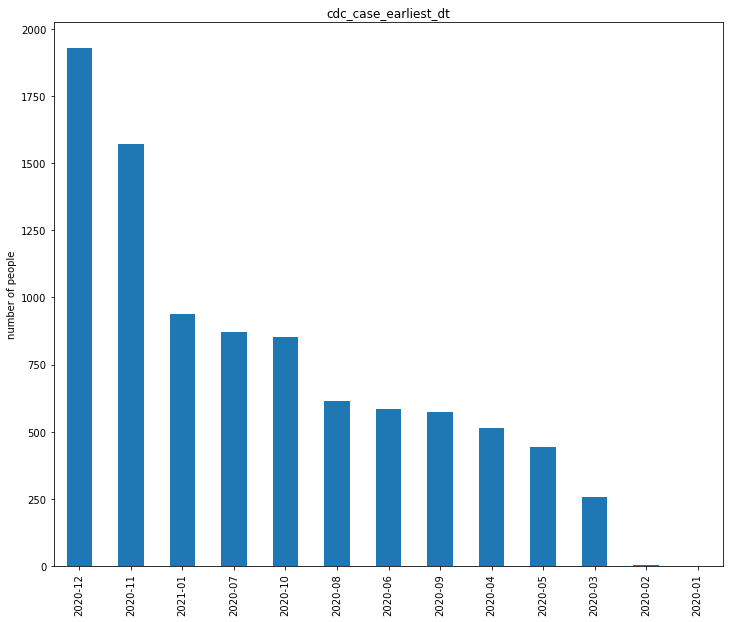

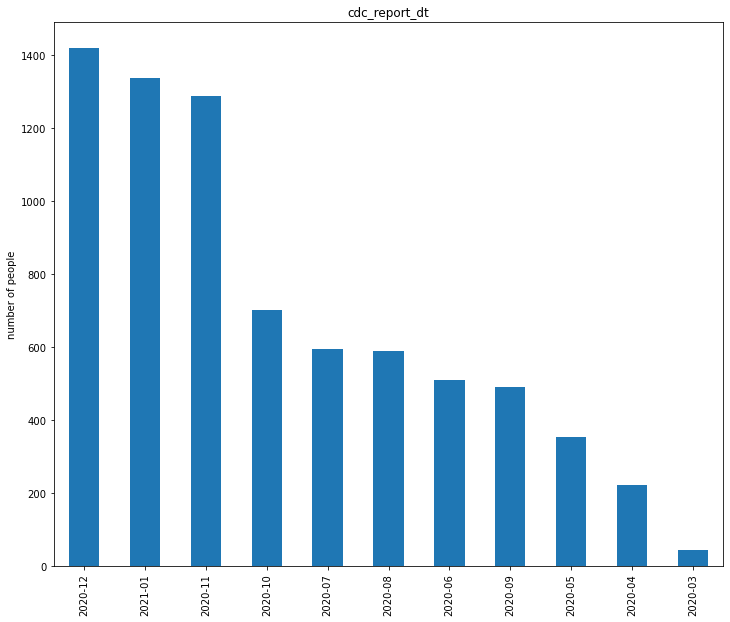

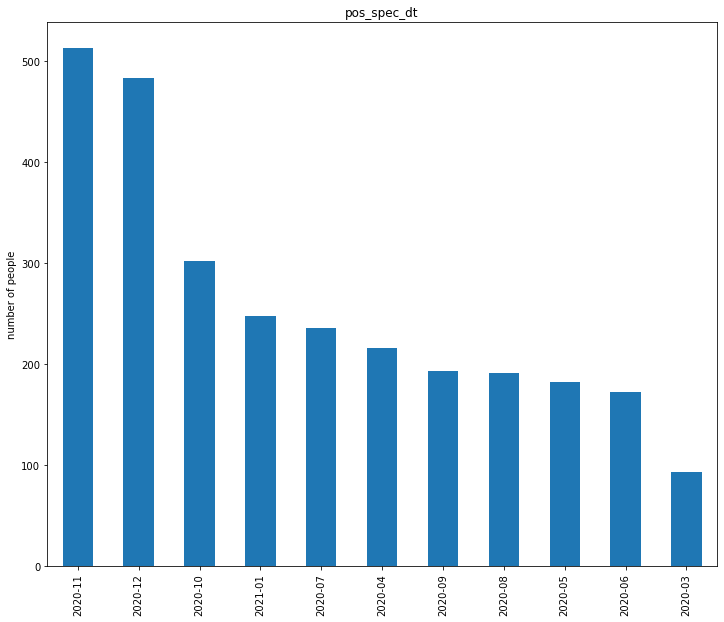

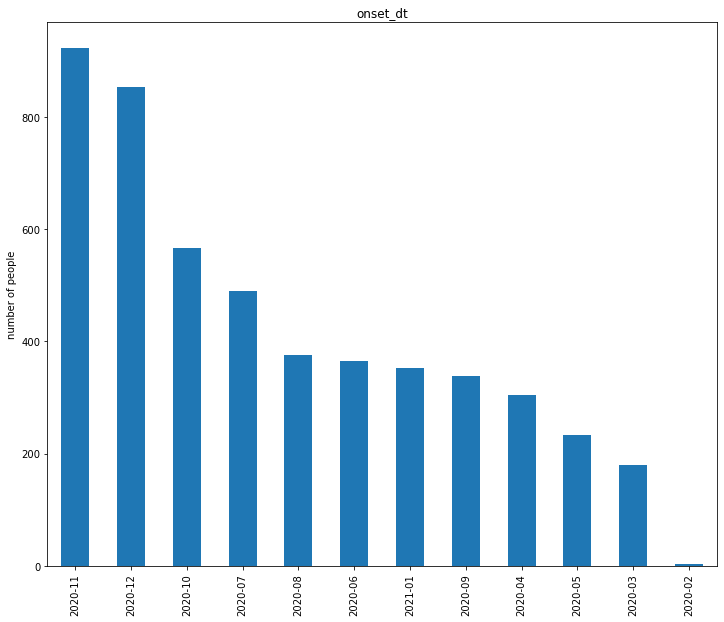

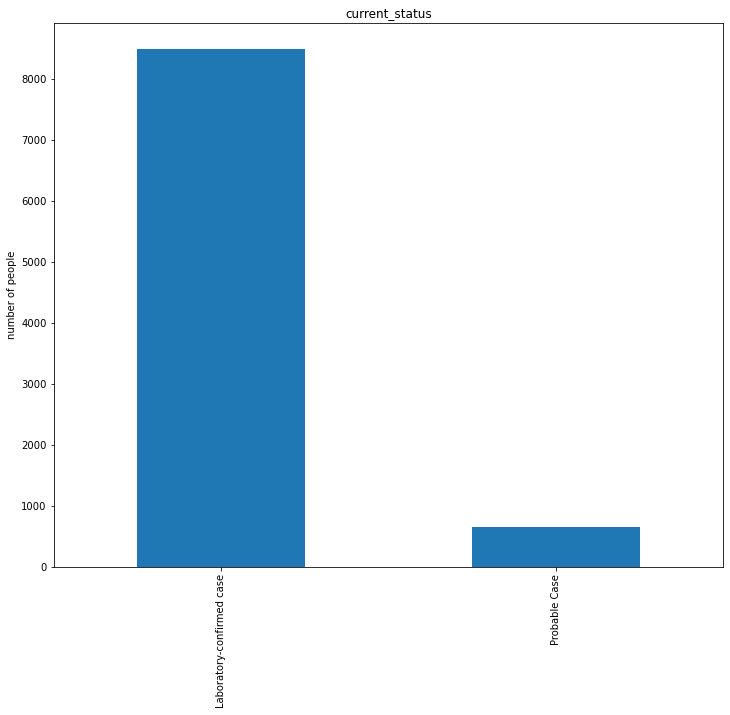

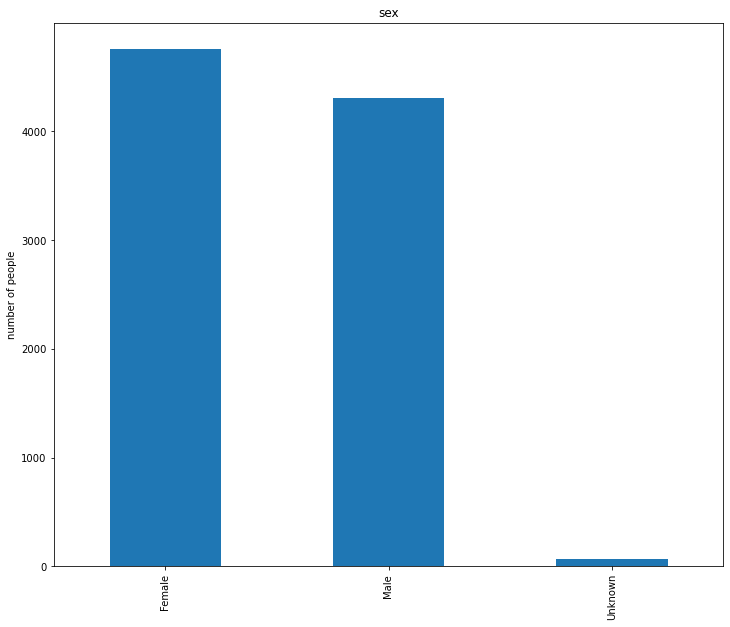

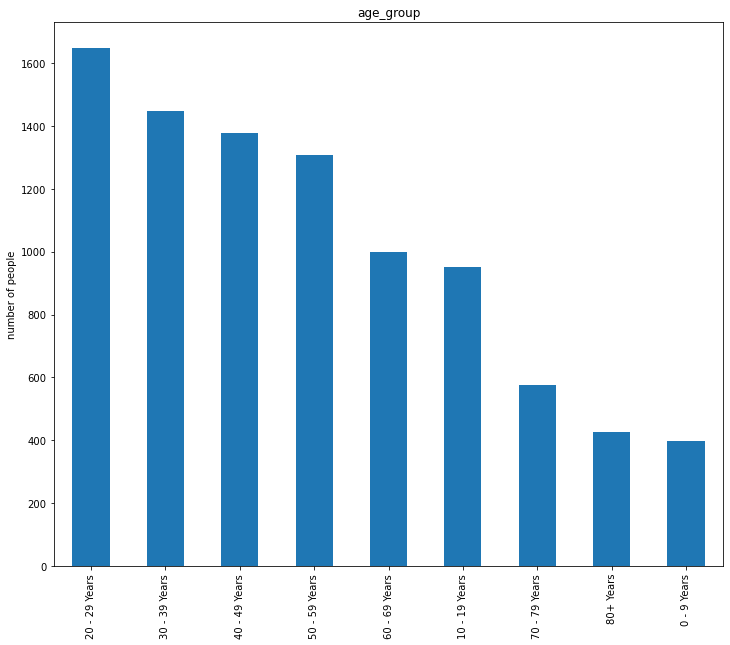

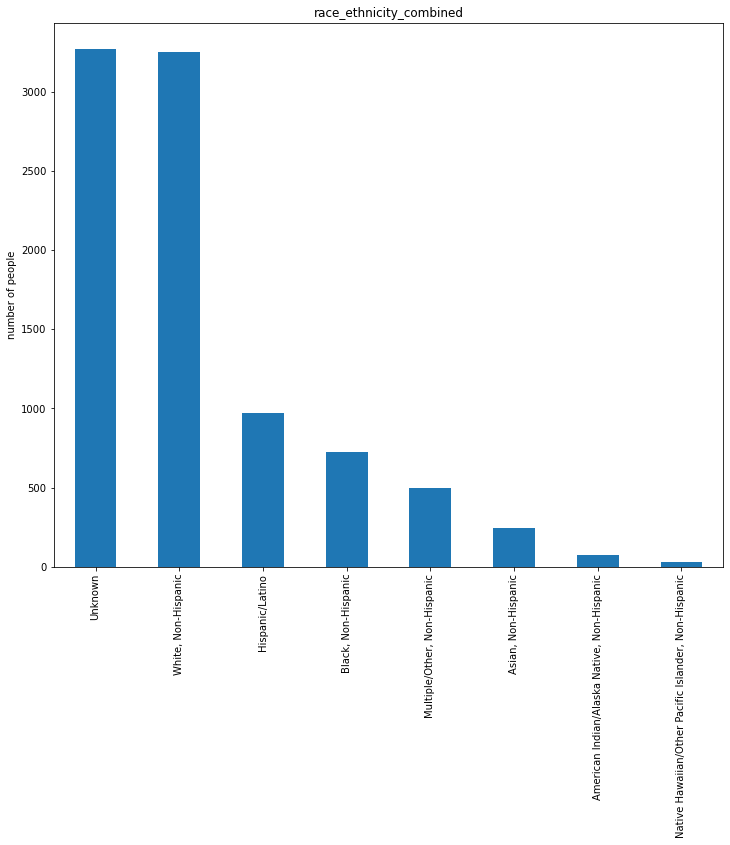

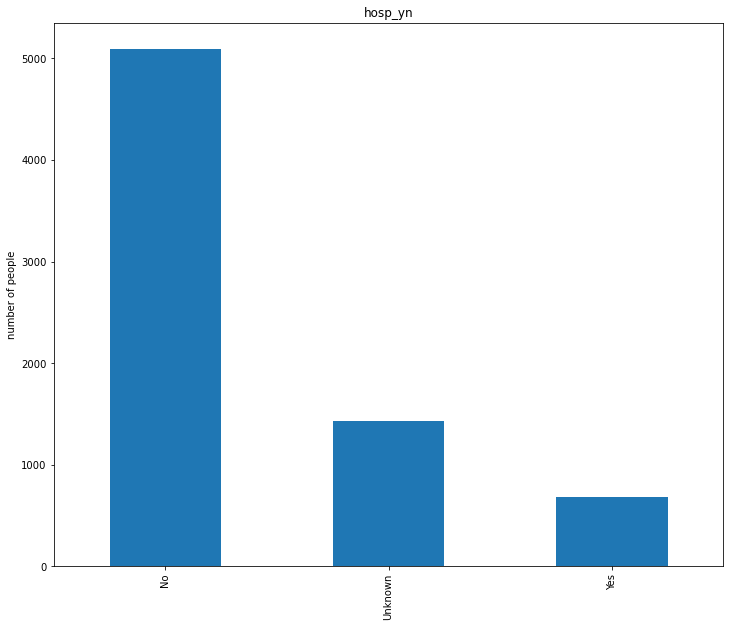

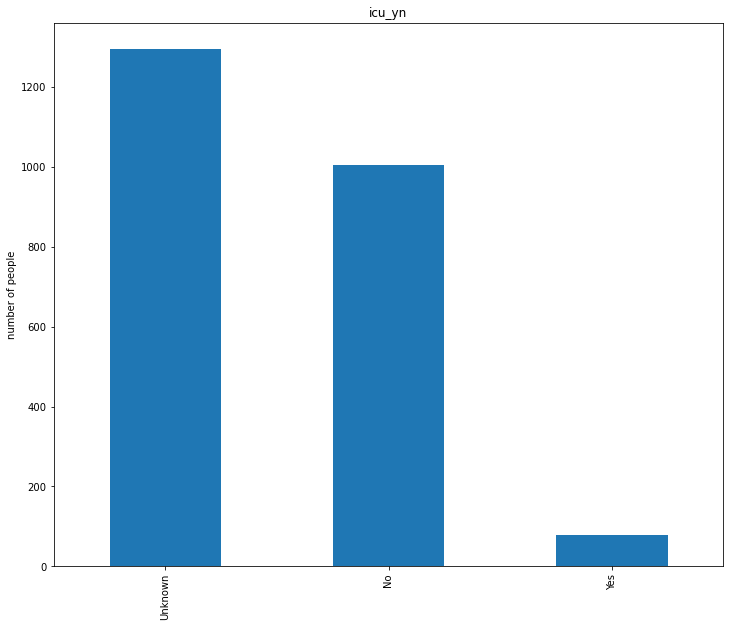

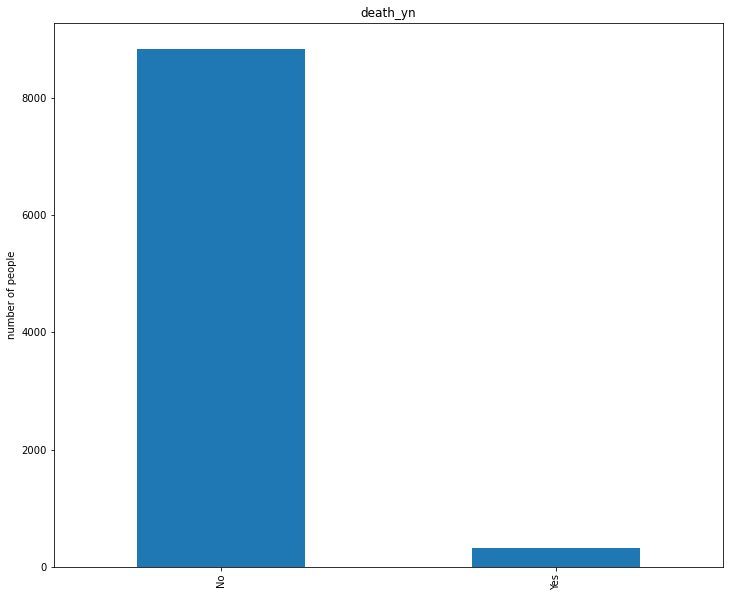

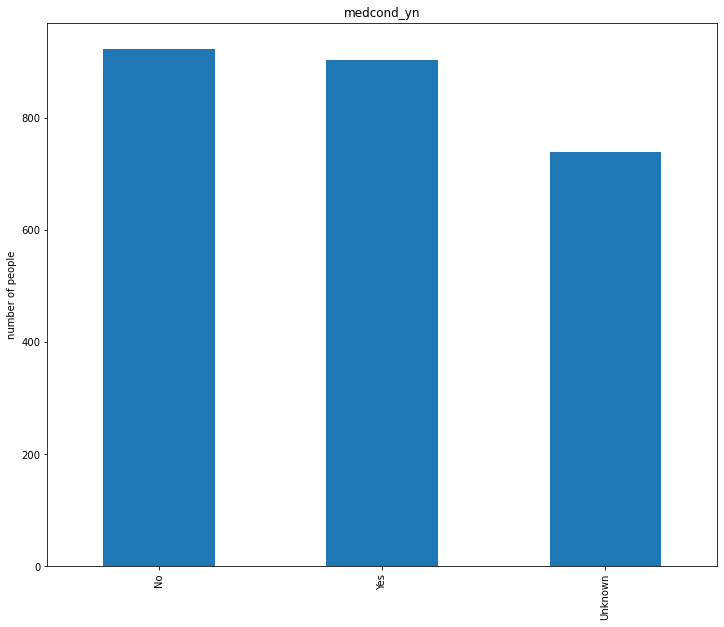

In [35]:
pp = PdfPages('Covid19_DataQualityReport_CategoricalFeatures_barcharts_V1.pdf')

# Plot a histogram summary sheet of the continuous features and save in a png file
for col in categorical_columns:
    f = df[col].value_counts().plot(kind='bar', figsize=(12,10))
    plt.title(col)
    plt.ylabel('number of people')
    pp.savefig(f.get_figure())
    plt.show()
    
pp.close()

### Assessment:

-  The ***cardinalities*** of the Categorical features make sense. However it may be worth while investigating the 'unknown' values that are present across the dataset. Particularly in the case of *race_ethnicity_combined* where it is the modal value, as is evident from the bar chart. And also in *hosp_yn* where it makes up over 20% of the values of this feature.

-  There are a large number of **missing values** that will require further investigation.


### Initial Findings

 Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file.

# 2. Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **20206773_Data_Quality_Report.pdf**:

- The data has no apparent logical integrity issues, apart from one case where a patient was admitted to ICU but not to the hospital initially, it will be assumed that this case required immediate attention and therefore was admmited immediately to ICU. There were a number of rows where the logical integrity of the dates provided raised suspicion, however too many rows were affected and therefore it will be assumed that these rows are yet to be updated. This will be checked with the domain expert. 

- A total of 855 duplicate rows were found. These rows were deemed to be redundant due to the fact that the large majority of data across their features were either missing or unknown, therefore these rows were dropped from the dataset.


- A significant amount of missing values were found accross the dataset. These will need to be investigated further, some features may need to be dropped due to a large amount of missing values, while others may be imputed in order to retain some of the data. 

- A large percentage of the features including *race_ethnicity, hosp_yn medcond-yn, and icu_yn* are unknown, this must be invesitgated further.




### Proposed solutions to deal with the identified problems

1. Missing values 
- A total of 6 features were found to have a significant amount of missing values. Any feature with 50% or more missing values will be dropped from the dataset, based on the data quality report this includes 3 features in total these being *pos_spec_dt*, *icu_yn* and *medcond_yn*. 

- However *onset_dt* will not be dropped even though it has nearly 50% missing values, this is due to the fact that this feature records the date of onset of symptoms, if symptomatic. Therefore it can be assumed that the large proportion of missing values are due to assymptomatic patients who showed no symptoms and therefore this value could not be filled. These misssing values will be left as NaT.

- The remaing two features have roughly 20% of missing values, these being *cdc_report_dt* and *hosp_yn*. It is stated on the CDC website that "CDC recommends that researchers use cdc_case_earliest in time series and other time based analysis', due to the fact that in a large number of cases the dates (in months) match those of the corresponding *cdc_case_earliest_dt* entry, this feature can be dropped and the *cdc_case_earliest_dt* feature can be used as the sole record of the date the record was available. This will be investigated further. 

- Finally for the hosp_yn feature there is 21% of values missing. It would be in our best interest to retain this data as it is quite important to the analysis whether the patient was hospitalized or not. Data imputation will be performed to replace the missing values with a plausible estimate. 


2. Unkown values

- Due to the fact that *icu_yn* and *medcond_yn* are being dropped due to high percentage of missing values, this leaves just *race_ethnicity_combined* and *hosp_yn* with a large proprtion of unknown values. The rows affected by this will investigated and if appropriate they will be dropped from the analysis.

## Data Understanding: Data Quality Plan
The following lays out a potential data quality plan, listing all features and actions involving those features:


 
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|cdc_case_earliest_dt (datetime - months)                          |  none | Keep as is |
cdc_report_dt  (datetime - months)             | 17% missing values          | CDC reccomend to use cdc_case_earliest_dt , drop feature   | 
pos_spec_dt  (datetime - months)      | 69% missing values  | Too many missing values, drop feature |
onset_dt (datetime - months)          | 45% missing values       | Consider rows with missing values as asymptomatic patients | 
current_status (category)                 | None | Keep as is|   
sex (category)                | None | Keep as is|
age_group (category)    | None | Keep as is|
race_ethnicity_combined (category)                  | modal value is 'unkown' | invesitgate rows affected, consider dropping rows |
hosp_yn (category)                 | 21% missing values, 20% 'unknown' values | Investigate rows affected, consider imputation or dropping |    
icu_yn (category)                    | 74% missing values | Too many missing values, drop feature |  
death_yn (category)             | None | Keep as is |
medcond_yn (category)               | 72% missing values | Too many missing values, drop feature |


In [36]:
# List all features that need to be discussed in the data quality plan
df.nunique()

cdc_case_earliest_dt       13
cdc_report_dt              11
pos_spec_dt                11
onset_dt                   12
current_status              2
sex                         3
age_group                   9
race_ethnicity_combined     8
hosp_yn                     3
icu_yn                      3
death_yn                    2
medcond_yn                  3
dtype: int64

In [37]:
df.dtypes

cdc_case_earliest_dt       period[M]
cdc_report_dt              period[M]
pos_spec_dt                period[M]
onset_dt                   period[M]
current_status              category
sex                         category
age_group                   category
race_ethnicity_combined     category
hosp_yn                     category
icu_yn                      category
death_yn                    category
medcond_yn                  category
dtype: object

### Applying solutions to obtain a new CSV file where the identified data quality issues were addressed. 

1. **Missing Values**

Based on the CDC recommendations on their website and the fact that 17% of the data for *cdc_report_dt* are missing, it would be safe to assume that this feture can be dropped. As seen below the number of rows where *cdc_case_earliest_dt* matches *cdc_report_dt* is 5418, which is a signifcant proportion of this feature. Therefore this feature will be dropped along with *cdc_report_dt, pos_spec_dt* and *medcond_yn* which all have roughly 70% missing values, while these fetures may have been useful for analysis of the dataset, this percentage of missing values is simply too high and no method of replacing their missing values would be appropriate. Therefore these features will be dropped.  



In [38]:
report_dt = df[['cdc_case_earliest_dt','cdc_report_dt']][df['cdc_case_earliest_dt']==df['cdc_report_dt']]
print("Number of rows where cdc_case_earliest_dt equals cdc_report_dt : ", report_dt.shape[0])


Number of rows where cdc_case_earliest_dt equals cdc_report_dt :  5418


In [39]:
#drop features with large percentage of missing values 
df = df.drop(['cdc_report_dt','pos_spec_dt','icu_yn','medcond_yn'], axis = 1) 

We will impute the missing data for the feature *hosp_yn*, as can be seen below the modal value of this feature is 'No' i.e. the patient was not hospitalized due to the virus. These missing values will be replaced with this modal value.

In [40]:
#data imputation - replace all NaN values with 'No', this being the modal value for this feature as discovered above when checking for constant columns.
df['hosp_yn'] = df['hosp_yn'].fillna('No') 

2. **Unknown data entries**

The modal value for *race_ethnicity_combined is* 'Unknown' as seen in the descriptive statistics table in section one, with a total of 3271 entries unknown out of 9063. Similarly the second modal value for *hosp_yn* is 'unknown', these data entries are essentially missing values but it would not make sense to drop these features completely as they will provide useful information in our analysis.

In [41]:
unknown_race  = 100 * (df["race_ethnicity_combined"]=='Unknown').sum()/df.shape[0]
unknown_hosp = 100 * (df["hosp_yn"]=='Unknown').sum()/df.shape[0]
print("Percentage of unknown values in race_ethnicity_combined:", unknown_race, "%")
print("Percentage of unknown values in hosp_yn:", unknown_hosp, "%")

Percentage of unknown values in race_ethnicity_combined: 35.768179332968835 %
Percentage of unknown values in hosp_yn: 15.615090213231275 %


In [42]:
unknown_hospital = df[df["hosp_yn"]=='Unknown']
unknown_hospital.head(10)

,cdc_case_earliest_dt,onset_dt,current_status,sex,age_group,race_ethnicity_combined,hosp_yn,death_yn
3,2020-10,NaT,Laboratory-confirmed case,Male,50 - 59 Years,"Black, Non-Hispanic",Unknown,No
15,2020-12,NaT,Laboratory-confirmed case,Male,60 - 69 Years,"White, Non-Hispanic",Unknown,No
16,2021-01,NaT,Laboratory-confirmed case,Female,30 - 39 Years,"Black, Non-Hispanic",Unknown,No
19,2020-04,2020-04,Laboratory-confirmed case,Female,30 - 39 Years,Unknown,Unknown,No
30,2020-12,2020-12,Laboratory-confirmed case,Female,20 - 29 Years,Unknown,Unknown,No
35,2020-04,NaT,Laboratory-confirmed case,Male,20 - 29 Years,Unknown,Unknown,No
38,2020-09,NaT,Laboratory-confirmed case,Unknown,20 - 29 Years,Unknown,Unknown,No
51,2020-06,2020-06,Laboratory-confirmed case,Female,10 - 19 Years,Unknown,Unknown,No
57,2021-01,NaT,Laboratory-confirmed case,Female,40 - 49 Years,Unknown,Unknown,No
64,2020-12,NaT,Laboratory-confirmed case,Male,10 - 19 Years,"Multiple/Other, Non-Hispanic",Unknown,No


In [43]:
unknown_dt = df[['race_ethnicity_combined','hosp_yn']][df['race_ethnicity_combined']=='Unknown'][df['hosp_yn']=='Unknown']
print("Number of rows where cdc_case_earliest_dt equals cdc_report_dt : ", unknown_dt.shape[0])

Number of rows where cdc_case_earliest_dt equals cdc_report_dt :  914


The large majority of rows with unknown hospilization entries also have unknown ethnicity, therefore we will drop the hospilization rows to get rid of any 'unknown' values remaining in this feature. dropping a total of 914 rows from the dataset. 

In [44]:
i = df[(df.hosp_yn == 'Unknown')].index
df = df.drop(i)

In [45]:
#check rows where hosp_yn is missing 
unknown_race  = 100 * (df["race_ethnicity_combined"]=='Unknown').sum()/df.shape[0]
unknown_hosp = 100 * (df["hosp_yn"]=='Unknown').sum()/df.shape[0]
print("Percentage of unknown values in race_ethnicity_combined:", unknown_race, "%")
print("Percentage of unknown values in hosp_yn:", unknown_hosp, "%")

Percentage of unknown values in race_ethnicity_combined: 30.542957107684334 %
Percentage of unknown values in hosp_yn: 0.0 %


Dropping these rows brings the percentage of unknown values in this feature down to 30%, due to the high cardniality of this feature it would be difficult to impute these missing values. However it would not make sense to drop this feature as it provides useful information for our analysis regarding the demographic of cases, while the large proportion of unkown values is not ideal, it will not hinder further analysis for any machine learning algorithm. It must also be considered that within the case report form filled out by patients, unknown was an option, therefore a patient may have chosen the value due to the fact they don’t fit into a predefined category. Therefore this feature could still show trends and information for people who chose this option.

### Save updated datafram to a new csv file "covid19-cdc-20206773-cleaned_V2.csv"

In [46]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc-20206773-cleaned_V2.csv', index=False)

# 3. Exploring relationships between feature pairs:

As there are no numericla features in this dataset we will only be looking at categorical vs categorical feature plots, for the purpose of this report regular bar plots and stacked bar plots will be used to visualize the relationship between the features within this dataset. Hopefully these visulizations will give some indication as to how the data is behaving and will allow us to make more sense of the tabulated data. We will analyse the following categorical features for pairwise feauture interaction:

- sex
- age group
- hospitalization
- death 
- Race/ ethnicity
 
These features were chosen as they are strong predictors when analysing our target feature death risk, by plotting these features against the death rate we will be able to determine which features have a greater effect on the target feature.
 


### Categorical vs Categorical feature plots

### Plot 1: Age vs. death Rate

age_group
Index 	 Count
40 - 49 Years 	 1142
20 - 29 Years 	 1368
60 - 69 Years 	 869
30 - 39 Years 	 1179
10 - 19 Years 	 798
0 - 9 Years 	 321
50 - 59 Years 	 1152
80+ Years 	 379
70 - 79 Years 	 499
nan 	 0


(0.0, 100.0)

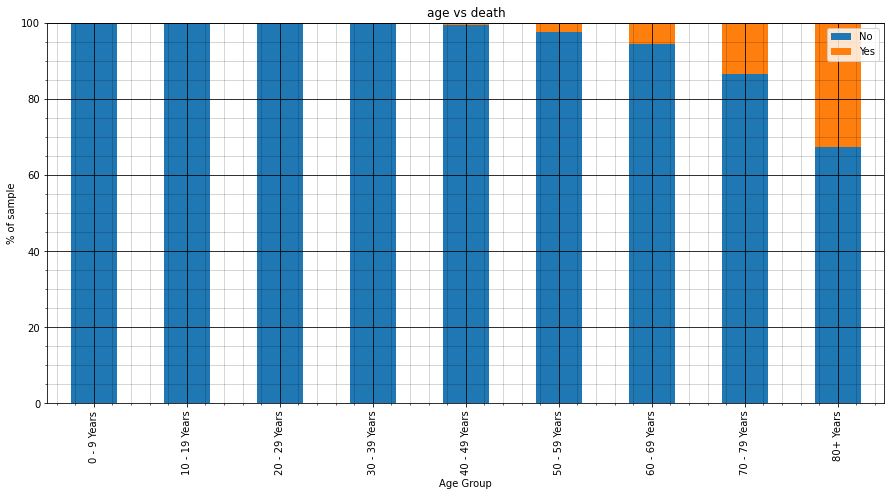

In [47]:
#Using code from the module lab
age_group = pd.unique(df["age_group"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("age_group")
print("Index \t Count")

# for each delinquency category
for i in age_group:
    
    count = df[df["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_group'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()
my_plot = group.unstack().plot(kind='bar', stacked=True, title= "age vs death", figsize=(15,7), grid=True)

# add legend
my_plot.legend(["No", "Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Age Group")
my_plot.set_ylabel("% of sample")
my_plot.set_ylim([0,100])

Above we can see a stacked bar plot for age group against percentage of deaths within the sample. 

- The data is as expected, with death rates increasing as age increases from 0-9 years up to 80+ years.
- This trend begins at 40-49  years and then almost doubles for each subsequent age grouping.
- from this plot we can be assured that the age and death data is correct as this increasing trend in death rates is as expected 

### Plot 2: race/ ehtnicity vs. death rate 

sex
Index 	 Count
Unknown 	 2357
Black, Non-Hispanic 	 644
White, Non-Hispanic 	 3026
Hispanic/Latino 	 888
Asian, Non-Hispanic 	 212
Multiple/Other, Non-Hispanic 	 420
nan 	 0
Native Hawaiian/Other Pacific Islander, Non-Hispanic 	 27
American Indian/Alaska Native, Non-Hispanic 	 67


(0.0, 100.0)

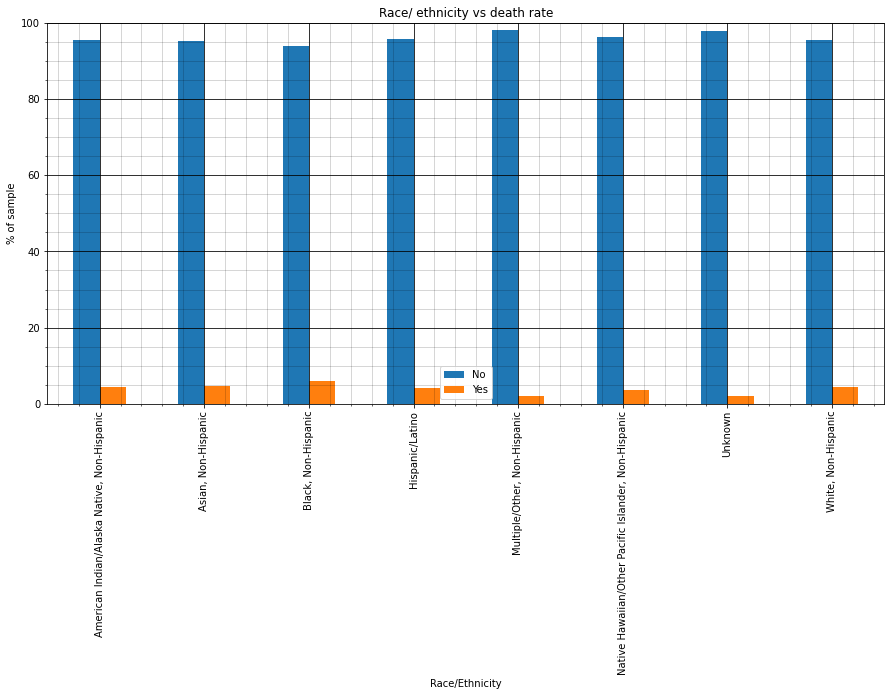

In [48]:
#Using code from the module lab
race_ethnicity_combined = pd.unique(df["race_ethnicity_combined"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("sex")
print("Index \t Count")

# for each delinquency category
for i in race_ethnicity_combined:
    
    count = df[df["race_ethnicity_combined"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['race_ethnicity_combined'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','race_ethnicity_combined','death_yn']].groupby(['race_ethnicity_combined','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', title= "Race/ ethnicity vs death rate", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["No", "Yes"])
    
# add gridlines
plt.grid(b=True, which='major', color='black', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='black', linestyle='-', alpha=0.2)

my_plot.set_xlabel("Race/Ethnicity")
my_plot.set_ylabel("% of sample")
my_plot.set_ylim([0,100])

Above we can see a stacked bar plot for race/ethnicity against percentage of deaths within the sample. 

- The death rate variation among different race/ ethnicities seems to vary quite a bit.
- while they are all relatively low it would seem that 'black, Non-Hispanic' and 'White, non-Hispanic' have the highest amount of deaths.
- while 'Multiple/Other, Non Hispanic' has the lowest percentage of deaths. 

### Plot 3: Hospitilization vs Death rate 

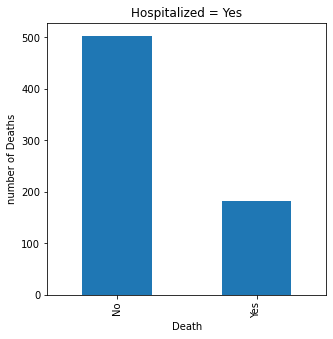

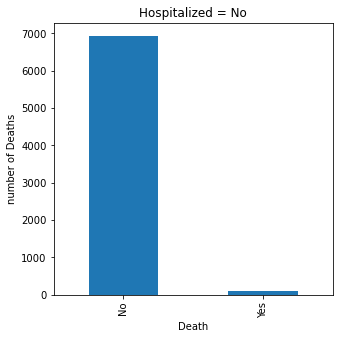

In [49]:
Yes_Hosp = df[df["hosp_yn"]=='Yes']
f = Yes_Hosp["death_yn"].value_counts().plot(kind='bar', figsize=(5,5))
plt.title("Hospitalized = Yes")
plt.ylabel('number of Deaths')
plt.xlabel('Death')
plt.show()

No_Hosp = df[df["hosp_yn"]=='No']
f = No_Hosp["death_yn"].value_counts().plot(kind='bar', figsize=(5,5))
plt.title("Hospitalized = No")
plt.ylabel('number of Deaths')
plt.xlabel('Death')
plt.show()

Above we can see the bar plots for number of deaths of those who were hospitalised and those who were not. 

- The figures are as expected. relative to the number of people who did not die in that category the number of deaths of those who have been hospitalized is much greater than those who have not.

- We must also take account for the fact that in total the number of people not hospitalized is far greater than the number of those who were and this therefore leads to different scales used on the axis of these plot. While the plots would lead you to believe that the total number of people who died who were hospitalized is far greater, they are actually roughly the same in both plots (~200).

### Plot 4: Sex vs Death rate 

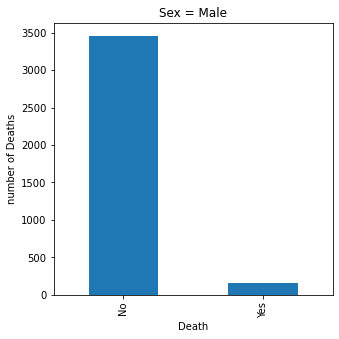

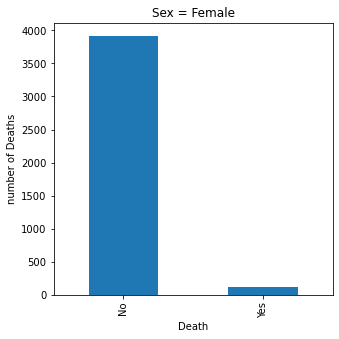

In [50]:
Male = df[df["sex"]=='Male']
f = Male["death_yn"].value_counts().plot(kind='bar', figsize=(5,5))
plt.title("Sex = Male")
plt.ylabel('number of Deaths')
plt.xlabel('Death')
plt.show()

Female = df[df["sex"]=='Female']
f = Female["death_yn"].value_counts().plot(kind='bar', figsize=(5,5))
plt.title("Sex = Female")
plt.ylabel('number of Deaths')
plt.xlabel('Death')
plt.show()

Above we can see the bar plots for number of deaths of those who are Male and those who are female. The two plots are very similar with almost equal levels of deaths, this is a strong indicator that gender does not have much effect on the target feature. 


### Discussion of findings

- Categorical vs Categorical features:
   - We see a strong link between increasing age and death rate as is expected.  
   - There are no evident links between race/ethnicity and death rate, it would seem that the death rate percentage across th groupings of ethnicities is quite similar. It was pointed out above how two of these groups have a marginally higher percentage of deaths, but this could be due to the fact that 'white, non hispanic' and 'black, non hispanic' make up a large proportion of the data set, in particular 'white, non hispanic' which is the modal value of *race_ethnicity_combined* in our most up to date dataframe.
   - The pairwise analysis of hospilization vs. death rate is as expected, in general those who were hospitalized have a higher chance of dying from covid-19. The large majority of this sample were not hospitalize. roughly 700 people were, and of those 700 approximately 200 died, as is evident from the bar plot above. 
   - There is no evident link between gender and death rate, from the bar plot it is clear that roughly the same amount of males and females died as a result of covid-19.

# 4. Transform, extend or combine the existing features to create a few new features.


### New feature 1 


Death_or_Hospital gives an indication of whether or not the patient:
- visited hospital due to covid-19 (label:  **Hospital**)
- died of covid-19 (label: **Death**)
- both visited hospital and died of covid-19 (label: **Both**)
- Neither visited the hospital or died of covid-19 (lael: **None**)

From analysis of this data we can see in the bar plot below that the large majority of the sample fall under the category 'None', while just over 500 patients visited hospital only. Just under 100 patients died of covid without visiting the hospital and 183 patients both visited hospital and died of covid. 

By creating this feature we get a better understanding of the breakdown of hospilization vs. death rates, it gives a better image of how this sample of patients were treated medically. In further analysis it would be interesting to do pairwise analaysis between this feature and the death rate.

In [51]:
#create function that will return category type based on the hosp_yn.
def Death_or_Hospital(df):
    if (df.hosp_yn == 'Yes') & (df.death_yn == 'Yes'):
          return "Both"
    if (df.hosp_yn == 'Yes') & (df.death_yn == 'No'):
          return "Hospital"   
    if (df.hosp_yn == 'No') & (df.death_yn == 'Yes'):
          return "Death"
    if (df.hosp_yn == 'No') & (df.death_yn == 'No'):
          return "None"

df.apply (lambda df: Death_or_Hospital(df), axis=1)

1           None
2           None
5           None
6           None
7           None
          ...   
9995        None
9996        None
9997    Hospital
9998        None
9999        None
Length: 7717, dtype: object

In [52]:
#create new feature using lambda function and Death_or_Hospital function
df['Death_or_Hospital'] = df.apply (lambda df: Death_or_Hospital(df), axis=1)
#convert to type catgeory
df['Death_or_Hospital'] = df['Death_or_Hospital'].astype('category')

In [53]:
#check the value counts
df["Death_or_Hospital"].value_counts()

None        6933
Hospital     503
Both         183
Death         98
Name: Death_or_Hospital, dtype: int64

<AxesSubplot:xlabel='Hospitilization or Death', ylabel='Number of people'>

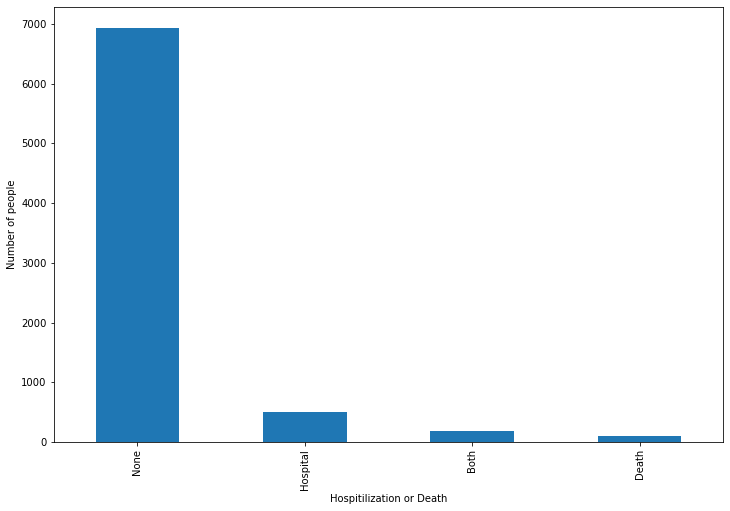

In [54]:
#plot the new feature
df["Death_or_Hospital"].value_counts().plot(kind='bar', figsize=(12,8), xlabel='Hospitilization or Death',ylabel='Number of people')

### New feature 2

*Symptomatic* indicates whether or not the patient was symptomatic or asymptomatic after contracting covid-19. This is based off the fact that we are assuming that all null values in the onset_dt feature are cases where no symptoms were diplayed and as a result the values were left empty. *Symptomatic* therefore indicates:

- **True** if the patient was symptomatic.
- **False** if the patient was asymptomatic.

From the analysis we can see that an estimated total of 4704 patients were symptomatic and 3012 were asympotmatic. By creating this feature we can get a good idea of patients and which ones displayed symptoms. For example we could perform pairwise analysis of age-goup vs. symptomatic to see how patients reacted to covid-19, this could also be checked across different ethnicites, genders etc. 




In [55]:
#creating new row where null values of onset_dt are mapped to.
df['Symptomatic'] = df["onset_dt"].notnull()

In [56]:
df["Symptomatic"].value_counts()

True     4704
False    3013
Name: Symptomatic, dtype: int64

<AxesSubplot:xlabel='Symptomatic', ylabel='Number of people'>

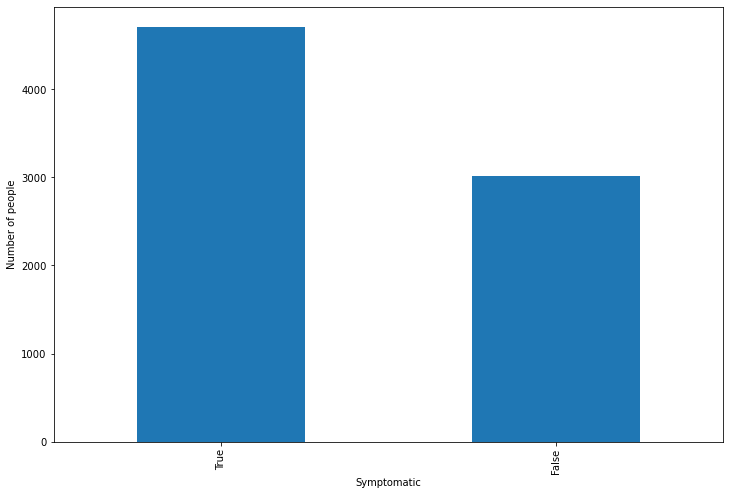

In [57]:
#plot the new feature
df["Symptomatic"].value_counts().plot(kind='bar', figsize=(12,8),xlabel='Symptomatic',ylabel='Number of people')

### New feature 3

*Description* provides analysts with a simple categorization of the patient based on their gender and age grouping, this grouping will be done as follows:

- Those in the **'0-9 years'** grouping will be described as *Child-Male* or *Child-Female*

- Those in the **'10-19 years'** grouping will be described as *Teenage-Male* or *Teenage-Female*

- Those in the **'20-29 years'** grouping will be described as *Young-Adult-Male* or *Young-Adult-Female*

- Those in the **'30-39 years', '40-49 years', '50 -59 years' or '60-69 years'** groupings will be described as *Adult-Male* or *Adult-Female*

- Those in the **'70-79 years' or '80+ years'** groupings will be described as *Senior-Male* or *Senior-Female*

- Finally those whose sex is described as 'unknown' will be left as unknown


By creating this feature it provides a categorization of the participants based on age and gender that may be quite useful further down the line when analysing the relationships between these features and a variety of other features included in the dataset. It provides a more generalized description of the patients that could be useful for quicker analysis of their age and gender in prediction models.

In [58]:
#create function that will return category type based on the sex feature.
def description(df):
    if (df.sex == 'Male') & (df.age_group == '0 - 9 Years'):
          return "Child-Male"
    if (df.sex == 'Female') & (df.age_group == '0 - 9 Years'):
          return "Child-Female"

    if (df.sex == 'Male') & (df.age_group == '10 - 19 Years'):
          return "Teenage-Male"
    if (df.sex == 'Female') & (df.age_group == '10 - 19 Years'):
          return "Teenage-Female"
        
    if (df.sex == 'Male') & (df.age_group == '20 - 29 Years'):   
          return "Young-adult-Male"
    if (df.sex == 'Female') & (df.age_group == '20 - 29 Years'):     
          return "Young-adult-Female"
      
    if  (df.sex == 'Male') & (df.age_group == '30 - 39 Years') | (df.sex == 'Male') & (df.age_group == '40 - 49 Years') | (df.sex == 'Male') & (df.age_group == '50 - 59 Years') | (df.sex == 'Male') & (df.age_group == '60 - 69 Years'):
          return "Adult-Male"
    if  (df.sex == 'Female') & (df.age_group == '30 - 39 Years') | (df.sex == 'Female') & (df.age_group == '40 - 49 Years') | (df.sex == 'Female') & (df.age_group == '50 - 59 Years') | (df.sex == 'Female') & (df.age_group == '60 - 69 Years') :
          return "Adult-Female"

    if  (df.sex == 'Male') & (df.age_group == '70 - 79 Years') | (df.sex == 'Male') & (df.age_group == '80+ Years') :
          return "Senior-Male"
    if  (df.sex == 'Female') & (df.age_group == '70 - 79 Years') | (df.sex == 'Female') & (df.age_group == '80+ Years') :
          return "Senior-Female"
        
    if (df.sex == 'Unknown'):
        return "Unknown"
        
df.apply (lambda df: description(df), axis=1)

1               Adult-Male
2         Young-adult-Male
5             Adult-Female
6             Adult-Female
7             Adult-Female
               ...        
9995          Adult-Female
9996            Adult-Male
9997            Adult-Male
9998          Teenage-Male
9999    Young-adult-Female
Length: 7717, dtype: object

In [59]:
#create new feature in the dataframe using lamda function and description function
df['description'] = df.apply (lambda df: description(df), axis=1)
#convert type to category
df['description'] = df['description'].astype('category')

In [60]:
df["description"].value_counts()

Adult-Female          2262
Adult-Male            2047
Young-adult-Female     729
Young-adult-Male       630
Senior-Female          492
Teenage-Female         399
Teenage-Male           388
Senior-Male            378
Child-Male             169
Child-Female           149
Unknown                 56
Name: description, dtype: int64

<AxesSubplot:xlabel='Description', ylabel='Number of people'>

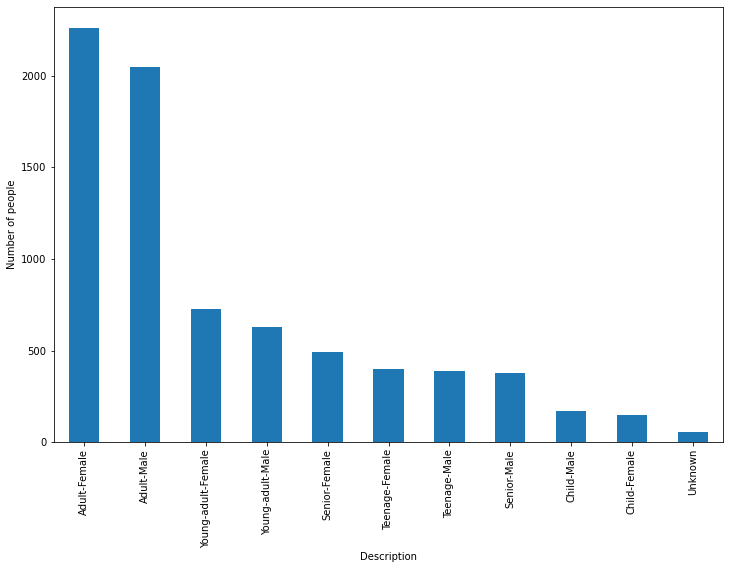

In [61]:
#plot new feature
df["description"].value_counts().plot(kind='bar', figsize=(12,8), xlabel='Description',ylabel='Number of people')

### Final data types, descriptive tables, save to csv

In [62]:
#drop 'percent' feature created when creating plots
df = df.drop(['percent'], axis = 1) 
df.dtypes

cdc_case_earliest_dt       period[M]
onset_dt                   period[M]
current_status              category
sex                         category
age_group                   category
race_ethnicity_combined     category
hosp_yn                     category
death_yn                    category
Death_or_Hospital           category
Symptomatic                     bool
description                 category
dtype: object

In [63]:
updated_categorical_columns = df.select_dtypes(['category', 'period[M]','bool']).columns
categorical_statistics = df[updated_categorical_columns].describe().T

In [64]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_categorical_statistics = pd.DataFrame(index = categorical_statistics.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
# Look at the values taken by each categorical feature

In [65]:
for column in updated_categorical_columns: 
    df_categorical_statistics.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_categorical_statistics.loc[column]['freq_mode'] = df[column].value_counts()[df_categorical_statistics.loc[column]['mode']]
    df_categorical_statistics.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_categorical_statistics.loc[column]['mode']]

    if df[column].value_counts().size > 1:
        df_categorical_statistics.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_categorical_statistics.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_categorical_statistics.loc[column]['2ndmode']]
        df_categorical_statistics.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_categorical_statistics.loc[column]['2ndmode']]
    else: df_categorical_statistics.loc[column] = '-'
        

In [66]:
# Prepare %missing column
updated_missing  = 100 * (df.isnull().sum()/df.shape[0])
# store the values in a dataframe
updated_missing = pd.DataFrame(updated_missing, columns=['%missing'])

In [67]:
# Put the columns together to prepare the final table 
df_category_columns_data_quality_report_table_cleaned = pd.concat([categorical_statistics, df_categorical_statistics, updated_missing], axis=1)
df_category_columns_data_quality_report_table_cleaned

,count,unique,top,freq,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode,%missing
cdc_case_earliest_dt,7717,12,2020-12,1486,2020-12,1486,0.192562,2020-11,1360,0.176234,0.000000
onset_dt,4704,12,2020-11,876,2020-11,876,0.186224,2020-12,777,0.165179,39.043670
current_status,7717,2,Laboratory-confirmed case,7139,Laboratory-confirmed case,7139,0.9251,Probable Case,578,0.0749,0.000000
sex,7709,3,Female,4035,Female,4035,0.523414,Male,3618,0.469322,0.103667
age_group,7707,9,20 - 29 Years,1368,20 - 29 Years,1368,0.177501,30 - 39 Years,1179,0.152978,0.129584
race_ethnicity_combined,7641,8,"White, Non-Hispanic",3026,"White, Non-Hispanic",3026,0.396021,Unknown,2357,0.308467,0.984839
hosp_yn,7717,2,No,7031,No,7031,0.911105,Yes,686,0.088895,0.000000
death_yn,7717,2,No,7436,No,7436,0.963587,Yes,281,0.036413,0.000000
Death_or_Hospital,7717,4,None,6933,None,6933,0.898406,Hospital,503,0.065181,0.000000
Symptomatic,7717,2,True,4704,True,4704,0.609563,False,3013,0.390437,0.000000


### Save updated dataframe to a new csv file "covid19-cdc-20206773-cleaned_V3.csv"

In [68]:
# Write the dataframe to a csv file
df.to_csv('covid19-cdc-20206773-cleaned_V3.csv', index=False)